<a href="https://www.kaggle.com/code/elianabean/gnome-home-crisis-part-2?scriptVersionId=160557774" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import matplotlib.pyplot as plt
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df = pd.read_csv("/kaggle/input/the-reddit-climate-change-dataset/the-reddit-climate-change-dataset-comments.csv", nrows=1000)

/kaggle/input/the-reddit-climate-change-dataset/the-reddit-climate-change-dataset-comments.csv
/kaggle/input/the-reddit-climate-change-dataset/the-reddit-climate-change-dataset-posts.csv


[('US', 74), ('China', 60), ('California', 39), ('Russia', 29), ('America', 23), ('Canada', 22), ('UK', 19), ('Alberta', 17), ('U.S.', 14), ('Pakistan', 11), ('n’t', 11), ('United States', 10), ('Texas', 10), ('Mexico', 9), ('Afghanistan', 8), ('Greenland', 8), ('california', 8), ('France', 8), ('Taiwan', 7), ('Georgia', 7), ('Ukraine', 6), ('USA', 6), ('Israel', 6), ('Houston', 6), ('Germany', 6), ('England', 6), ('Quebec', 5), ('London', 4), ('china', 4), ('NZ', 4), ('Florida', 4), ('pakistan', 4), ('Cleveland', 3), ('Obama', 3), ('Colorado', 3), ('’s', 3), ('LA', 3), ('Finland', 3), ('Iraq', 3), ('Washington', 3), ('Alaska', 3), ('Miami', 3), ('The United States', 3), ('Hoffnung', 3), ('Australia', 3), ('Paris', 3), ('Sacramento', 2), ('Saudi Arabia', 2), ('Rome', 2), ('Seattle', 2)]


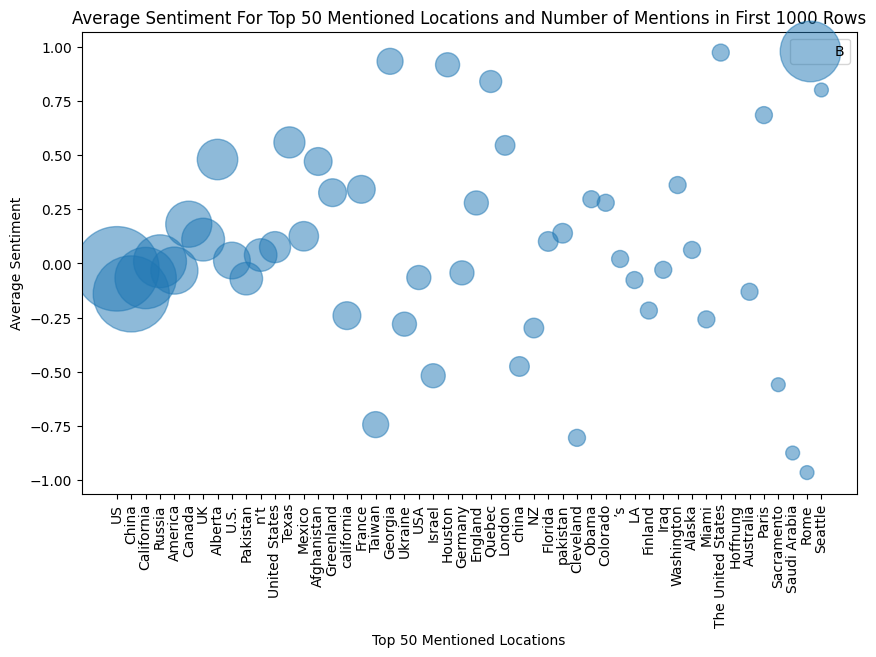

[('Biden', 50), ('TxDOT', 12), ('Bernie', 8), ('Jack', 8), ('Trudeau', 7), ('Covid', 7), ('Baumbach', 7), ('Elon Musk', 6), ('Joe Biden', 5), ('OP', 4), ('Al Gore', 4), ('Bezos', 4), ('Verzweiflung', 4), ('Stop TxDOT I-45', 4), ('Davis', 4), ('Cameco', 4), ('max', 3), ('Duluth', 3), ('Nixon', 3), ('Greta', 3), ('Idk', 3), ('Putin', 3), ('Austin', 3), ('Styrofoam', 3), ('Teslas', 3), ('Hitler', 3), ('GW', 3), ('Percy', 3), ('Bernie Bot -Bernie_Bot_03', 3), ('Welsh', 3), ('Jordan Peterson', 3), ('Koch', 2), ('Tyler', 2), ('Kennedy', 2), ('David Koresh', 2), ('Jim Jones', 2), ('x26eks', 2), ('kinda', 2), ('Bill Gates', 2), ('Lol', 2), ('Truman Hunt', 2), ('Dianne Fienstien', 2), ('Jesus', 2), ('Jeff Bezos', 2), ('Klimakrise', 2), ('Die Klimabewegung', 2), ('Erderhitzung', 2), ('Jahren', 2), ('Die', 2), ('Vielleicht', 2)]


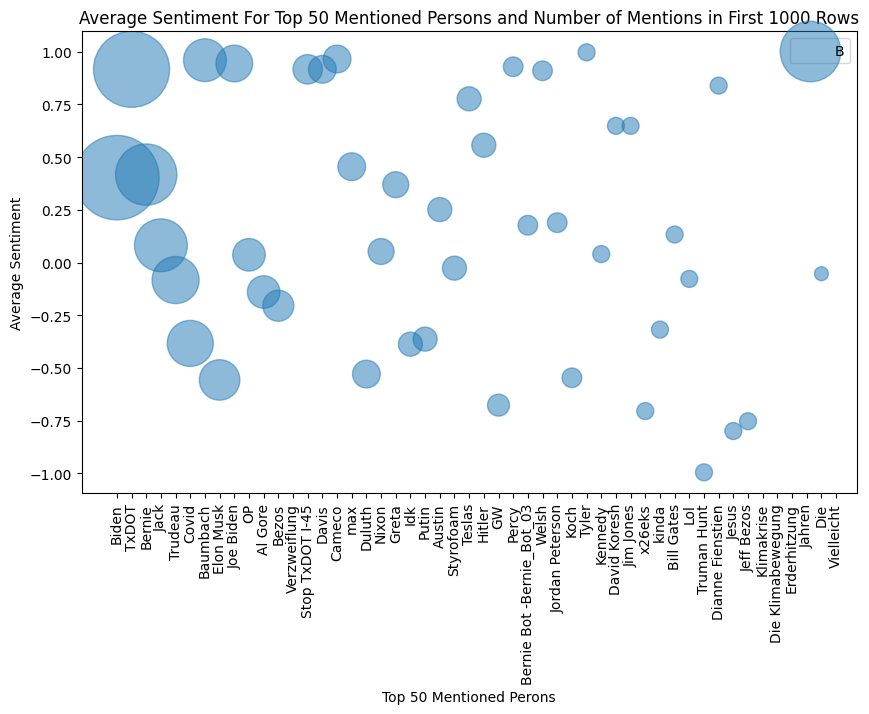

In [2]:
#level 2
# Finding the most frequently mentioned persons
import spacy
nlp = spacy.load("en_core_web_sm")

#df = df[df['subreddit.name'] == "worldnews"]
#print(df)

#Removing Stop Words
#from https://www.datasnips.com/58/remove-stop-words-from-text-in-dataframe-column/
import nltk
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
df['body'] = df['body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

#Spacy tutorial from https://realpython.com/natural-language-processing-spacy-python/#named-entity-recognition
def extract_locations(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents if ent.label_ == 'GPE']

locations = df['body'].apply(extract_locations)
locations = [name for sublist in locations for name in sublist]

from collections import Counter
c = Counter(locations)
mostCommon50locs = c.most_common(50)

print(mostCommon50locs)

import numpy as np

allLocs = []
avgLocSents = []
numLocMentions = []

for i in range(len(mostCommon50locs)):
    allLocs.append(mostCommon50locs[i][0])
    
    locSeries = df[df['body'].str.contains(mostCommon50locs[i][0], regex = False)]
    sentimentSeries = locSeries['sentiment'].mean()
    avgLocSents.append(sentimentSeries)
    
    numLocMentions.append(mostCommon50locs[i][1] * 50)


plt.figure(figsize=(10,6))
plt.scatter(allLocs, avgLocSents, s=numLocMentions, alpha=0.5)
#x is location, y is sentiment, z = number of mentions
#from https://python-graph-gallery.com/270-basic-bubble-plot/

plt.title("Average Sentiment For Top 50 Mentioned Locations and Number of Mentions in First 1000 Rows")

#Label the x-axis
plt.xlabel("Top 50 Mentioned Locations")
plt.xticks(rotation=90)

# label the y-axis
plt.ylabel("Average Sentiment")

plt.legend("Bubble Sizes is Proportional to Number of Mentions")

plt.show()

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#START NAMES
def extract_names(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents if ent.label_ == 'PERSON']

df = pd.read_csv("/kaggle/input/the-reddit-climate-change-dataset/the-reddit-climate-change-dataset-comments.csv", nrows=1000)
persons = df['body'].apply(extract_names)
persons = [name for sublist in persons for name in sublist]

from collections import Counter
c = Counter(persons)
mostCommon50ppl = c.most_common(50)
print(mostCommon50ppl)

import numpy as np

allPpl = []
avgPplSents = []
numPplMentions = []

for i in range(len(mostCommon50ppl)):
    allPpl.append(mostCommon50ppl[i][0])
    
    locSeries = df[df['body'].str.contains(mostCommon50ppl[i][0], regex = False)]
    sentimentSeries = locSeries['sentiment'].mean()
    avgPplSents.append(sentimentSeries)
    
    numPplMentions.append(mostCommon50locs[i][1] * 50)

plt.figure(figsize=(10,6))
plt.scatter(allPpl, avgPplSents, s=numLocMentions, alpha=0.5)
#x is location, y is sentiment, z = number of mentions
#from https://python-graph-gallery.com/270-basic-bubble-plot/

plt.title("Average Sentiment For Top 50 Mentioned Persons and Number of Mentions in First 1000 Rows")

#Label the x-axis
plt.xlabel("Top 50 Mentioned Perons")
plt.xticks(rotation=90)

# label the y-axis
plt.ylabel("Average Sentiment")

plt.legend("Bubble Sizes is Proportional to Number of Mentions")

plt.show()